**Bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as stats
from scipy.stats import ttest_rel

**Arquivo bp.csv - dados sobre a pressão sanguínea**

In [2]:
bp = pd.read_csv('/content/drive/MyDrive/Mestrado - Unicamp/1º Período/Metodologia Científica/bp.csv')

Entendendo o conjunto de dados

In [3]:
bp.head()


,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No


Observando a distribuição de diabéticos e não diabéticos

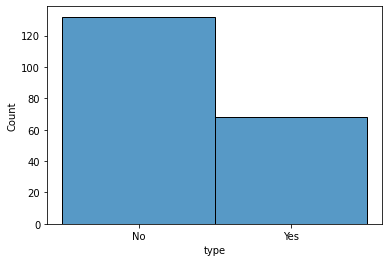

In [4]:
sns.histplot(data=bp, x="type")

Distribuição geral do conjunto



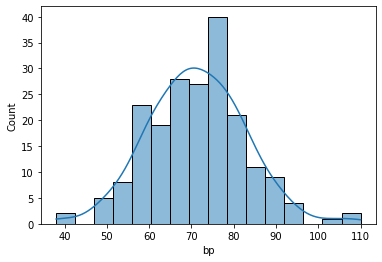

In [5]:

sns.histplot(data=bp, x="bp", kde=True)



Criando a partir do conjunto de dados original um novo, só com os dados dos **diabéticos**.

In [6]:
diabetico = bp[bp["type"] == "Yes"]
diabetico.head()

,bp,type
1,70,Yes
5,76,Yes
9,78,Yes
10,40,Yes
12,60,Yes


Ditribuição dos **diabéticos**.

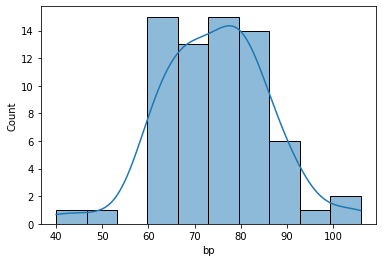

In [7]:
sns.histplot(data=diabetico, x="bp", kde=True)

Criando a partir do conjunto de dados original um novo, só com os dados dos **não diabéticos**.

In [8]:
Ndiabetico = bp[bp["type"] == "No"]
Ndiabetico.head()

,bp,type
0,68,No
2,82,No
3,76,No
4,60,No
6,58,No


Ditribuição dos **não diabéticos**.

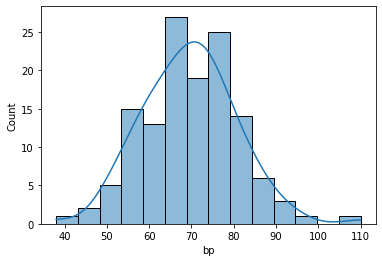

In [9]:
sns.histplot(data=Ndiabetico, x="bp", kde=True)

Comparação das duas distribuições

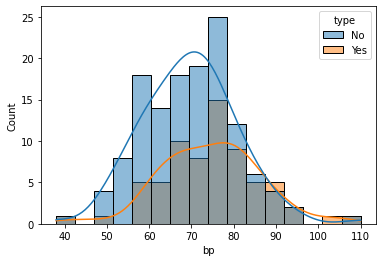

In [10]:
sns.histplot(data=bp, x="bp", hue="type", kde=True)

Analisando a pressão média e a pressão mediana dos dois grupos (Diabéticos e Não Diabéticos.)

In [11]:
d_bp = diabetico["bp"]
nd_bp = Ndiabetico["bp"]

In [12]:
d_bp.describe()

count     68.000000
mean      74.588235
std       11.583874
min       40.000000
25%       67.500000
50%       76.000000
75%       82.000000
max      106.000000
Name: bp, dtype: float64

In [13]:
nd_bp.describe()

count    132.000000
mean      69.545455
std       11.083557
min       38.000000
25%       62.000000
50%       70.000000
75%       76.000000
max      110.000000
Name: bp, dtype: float64

**Testes Estatísticos**

**Test Student T-test**

In [14]:
stats.ttest_ind(d_bp,nd_bp)

Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

**Test Wilcoxon rank sums**

In [15]:
stat, p = stats.ranksums(d_bp,nd_bp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.046, p=0.002
Probably different distributions


**Método de Bootstrap**

Intervalo de 95% de confiança para a pressão sangüínea dos pacientes com diabetes

In [16]:
d_bp = (d_bp,)
bootstrap_ci = stats.bootstrap(d_bp, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=71.77941176470588, high=77.29411764705883)


Intervalo de 95% de confiança para a pressão sangüínea dos pacientes sem diabetes

In [17]:
nd_bp = (nd_bp,)
bootstrap_ci = stats.bootstrap(nd_bp, np.mean, confidence_level=0.95,
                         random_state=1, method='BCa')

#IC 95% 
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=67.6590909090909, high=71.47727272727273)


**Cohen D**

In [18]:
d_bp = diabetico["bp"]
nd_bp = Ndiabetico["bp"]

In [19]:
# function to calculate Cohen's d for independent samples
def cohend(d_bp, nd_bp):
	# calculate the size of samples
	n1, n2 = len(d_bp), len(nd_bp)
	# calculate the variance of the samples
	s1, s2 = np.var(d_bp, ddof=1), np.var(nd_bp, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d_bp), np.mean(nd_bp)
	# calculate the effect size
	return (u1 - u2) / s
 



# calculate cohen's d
d = cohend(d_bp, nd_bp)
print('Cohens d: %.3f' % d)


Cohens d: 0.448


**Arquivo paired.csv - dados sobre duas medições: em Agosto e em Novembro em 13 lugares diferentes**.

In [20]:
paired = pd.read_csv('/content/drive/MyDrive/Mestrado - Unicamp/1º Período/Metodologia Científica/paired.csv')

In [21]:
paired.head()

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5


Criando um novo conjunto de dados referente as medições de Agosto

In [22]:
August = paired["August"]
August.head()

0     8.1
1    10.0
2    16.5
3    13.6
4     9.5
Name: August, dtype: float64

Análise da média e mediana

In [23]:
August.describe()

count    13.000000
mean     11.423077
std       3.451607
min       7.900000
25%       8.300000
50%      10.000000
75%      13.400000
max      18.300000
Name: August, dtype: float64

Distribuição dos dados medidos em Agosto

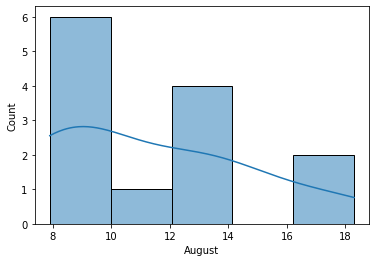

In [24]:
sns.histplot(data=August, kde=True)

Criando um novo conjunto de dados referente as medições de Novembro

In [25]:
November = paired["November"]
November.head()

0    11.2
1    16.3
2    15.3
3    15.6
4    10.5
Name: November, dtype: float64

Análise da média e mediana

In [26]:
November.describe()

count    13.000000
mean     16.323077
std       6.886963
min      10.500000
25%      12.700000
50%      15.300000
75%      16.300000
max      36.800000
Name: November, dtype: float64

Distribuição dos dados medidos em Novembro

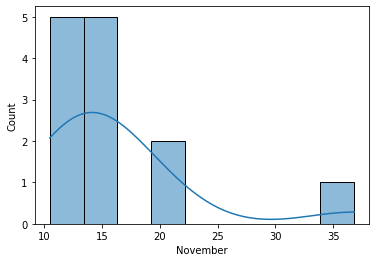

In [27]:
sns.histplot(data=November, kde=True)

**Testes Estatísticos**

**Test t pareado**

In [28]:
print( 'Rejeita a hipótese nula: {}'.format(ttest_rel(August, November)))

Rejeita a hipótese nula: Ttest_relResult(statistic=-2.3088956550760438, pvalue=0.03955525086687241)


**Wilcoxon signed rank**

In [29]:
stat, p = stats.wilcoxon(August, November)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=16.000, p=0.040
Probably different distributions
